In [1]:
# -＊- coding: utf-8 -＊-

### 以少量資料進行訓練

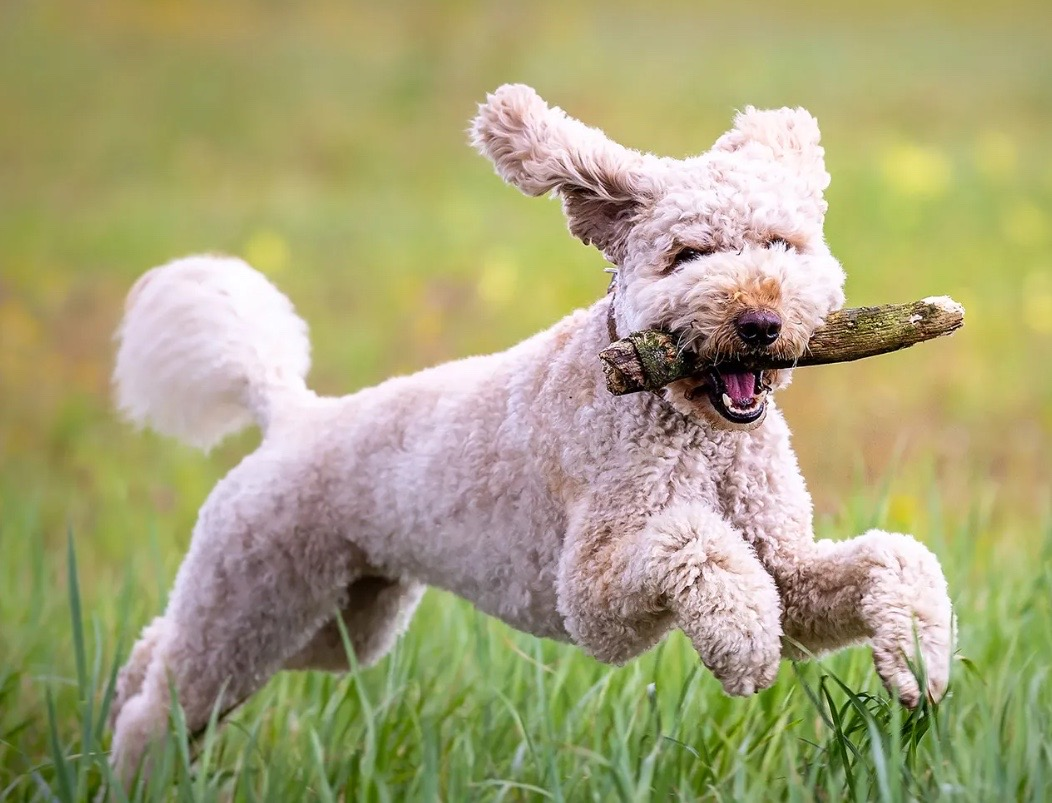

In [2]:
from IPython.display import Image
Image("img/test01.jpg")

### 複製圖片到訓練集、驗證集和測試集

In [3]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                    dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500) #----->每類2500張,共5000張

FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: 'cats_vs_dogs_small\\train\\cat'

### 建立神經網路

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x) #----->也可以用leaky relu
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) #----->or (2 , softmax)
model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [6]:
model.compile(loss="binary_crossentropy", #----->因為用softmax
       optimizer="rmsprop",
       metrics=["accuracy"])

#### 使用image_dataset_from_directory()來讀取影像


In [7]:
from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib

new_base_dir = pathlib.Path("cats_vs_dogs_small")



train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 17: invalid continuation byte

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
(4, 4)
(4, 4)
(4, 4)


#### 顯示train_dataset所產生的資料和標籤之shape

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

NameError: name 'train_dataset' is not defined

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
] #----->工作日誌  
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20


63/63 [==============================] - 43s 675ms/step - loss: 0.7010 - accuracy: 0.5010 - val_loss: 0.6925 - val_accuracy: 0.5030
Epoch 2/20
63/63 [==============================] - 43s 676ms/step - loss: 0.6980 - accuracy: 0.5260 - val_loss: 0.6907 - val_accuracy: 0.4990
Epoch 3/20
63/63 [==============================] - 44s 696ms/step - loss: 0.7050 - accuracy: 0.5605 - val_loss: 0.6778 - val_accuracy: 0.5640
Epoch 4/20
63/63 [==============================] - 46s 734ms/step - loss: 0.6644 - accuracy: 0.6010 - val_loss: 0.6475 - val_accuracy: 0.6020
Epoch 5/20
63/63 [==============================] - 44s 697ms/step - loss: 0.6223 - accuracy: 0.6545 - val_loss: 0.6552 - val_accuracy: 0.5970
Epoch 6/20
63/63 [==============================] - 43s 682ms/step - loss: 0.5815 - accuracy: 0.6910 - val_loss: 0.6285 - val_accuracy: 0.6460
Epoch 7/20
63/63 [==============================] - 43s 688ms/step - loss: 0.5596 - accuracy: 0.7000 - val_loss: 0.5639 - val_accuracy: 0.6900
Epoch 8/20

#### 繪製訓練過程中的損失值和準確度曲線

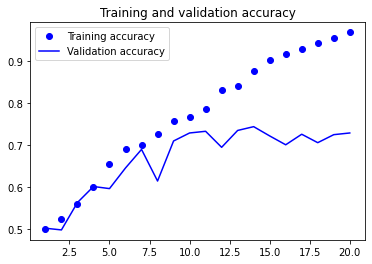

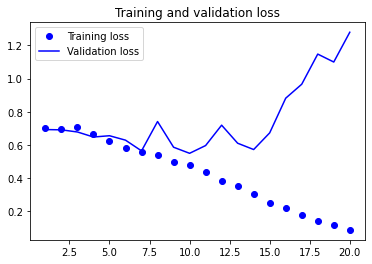

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### 使用測試集評估模型

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 11s 173ms/step - loss: 0.5654 - accuracy: 0.7145
Test accuracy: 0.715


### 使用資料擴增法(data augmentation）

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

#### 顯示一些隨機擴增的訓練影像

In [ ]:
import warnings
# 忽略警告
warnings.filterwarnings('ignore')

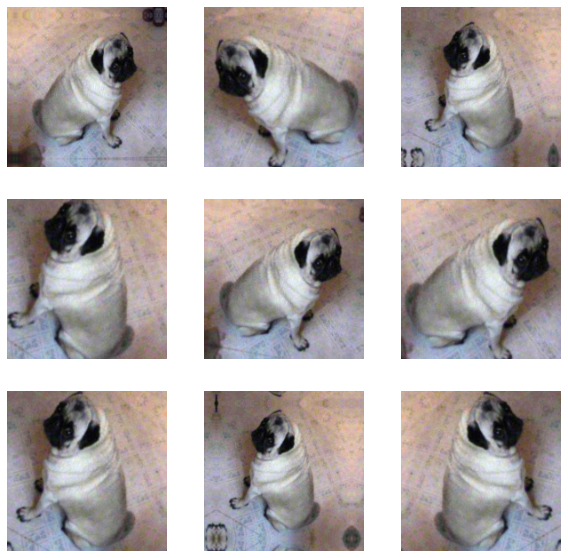

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):#取出第N批資料
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

#### 定義包含了影像擴增和Dropout層的新卷積神經網路

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
       optimizer="rmsprop",
       metrics=["accuracy"])

#### 訓練常規化後的卷積神經網路

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,#最好是3倍次數，這裡是節省時間的緣故
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 50s 746ms/step - loss: 0.6954 - accuracy: 0.5020 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 47s 750ms/step - loss: 0.6961 - accuracy: 0.5310 - val_loss: 0.6883 - val_accuracy: 0.5240
Epoch 3/20
63/63 [==============================] - 47s 740ms/step - loss: 0.6872 - accuracy: 0.5590 - val_loss: 0.6743 - val_accuracy: 0.6100
Epoch 4/20
63/63 [==============================] - 47s 748ms/step - loss: 0.6733 - accuracy: 0.5935 - val_loss: 0.6601 - val_accuracy: 0.6070
Epoch 5/20
63/63 [==============================] - 47s 753ms/step - loss: 0.6476 - accuracy: 0.6325 - val_loss: 0.6540 - val_accuracy: 0.6150
Epoch 6/20
63/63 [==============================] - 47s 746ms/step - loss: 0.6295 - accuracy: 0.6510 - val_loss: 0.6483 - val_accuracy: 0.6280
Epoch 7/20
63/63 [==============================] - 47s 745ms/step - loss: 0.6270 - accuracy: 0.6640 - val_loss: 0.6037 - val_accuracy: 0.6730

#### 用測試集來評估模型

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 156ms/step - loss: 0.5328 - accuracy: 0.7335
Test accuracy: 0.734


### 預測

In [ ]:
import numpy as np
from tensorflow.keras import utils

an_image =utils.load_img('train/cat.11513.jpg',target_size =(180,180))

an_image =utils.img_to_array(an_image)
an_image =np.expand_dims(an_image, axis =0)
verdict = model.predict(an_image)
print(verdict)
if verdict[0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

In [ ]:
import numpy as np
from tensorflow.keras import utils

an_image =utils.load_img('train/cat.11513.jpg',target_size =(180,180))

an_image =utils.img_to_array(an_image)
an_image =np.expand_dims(an_image, axis =0)
verdict = model.predict(an_image)
print(verdict)
if verdict[0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 29ms/step
[[0.03826096]]
cat
